### Machine Failure Dataset

In [107]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the train Dataset

In [108]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

### Check missing values

In [110]:
m = df.isna().sum()
m[m>0]

Series([], dtype: int64)

### Seperate X and Y

In [111]:
X = df.drop(columns=['Product ID', 'Type', 'HDF', 'OSF', 'Machine failure'])
Y = df[['Machine failure']]

In [112]:
X.head()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,PWF,RNF
0,0,300.6,309.6,1596,36.1,140,0,0,0
1,1,302.6,312.1,1759,29.1,200,0,0,0
2,2,299.3,308.5,1805,26.5,25,0,0,0
3,3,301.0,310.9,1524,44.3,197,0,0,0
4,4,298.0,309.0,1641,35.4,34,0,0,0


In [113]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


### Cat Con Seperation for X

In [114]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [115]:
cat

[]

### Create Sklearn pipeline for feature selection

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [117]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [118]:
cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ordinal', OrdinalEncoder())])

In [119]:
pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform='pandas')

In [120]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['id', 'Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'PWF', 'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 [])])

In [121]:
X_pre = pre1.fit_transform(X)
X_pre.head()

,num__id,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__PWF,num__RNF
0,-1.732038,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.049016,-0.047568
1,-1.732013,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.049016,-0.047568
2,-1.731987,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.049016,-0.047568
3,-1.731962,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.049016,-0.047568
4,-1.731937,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.049016,-0.047568


### Mutual Info Scores and plot

In [122]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([1.29771059e-05, 5.27797713e-03, 1.87932093e-03, 1.89315043e-02,
       1.95284264e-02, 6.99130165e-03, 7.88134959e-03, 1.15645393e-02,
       1.00366142e-03])

In [123]:
mi = pd.Series(mi)
mi.index = X_pre.columns
mi = mi.sort_values(ascending=False)
mi

num__Torque [Nm]                0.019528
num__Rotational speed [rpm]     0.018932
num__PWF                        0.011565
num__TWF                        0.007881
num__Tool wear [min]            0.006991
num__Air temperature [K]        0.005278
num__Process temperature [K]    0.001879
num__RNF                        0.001004
num__id                         0.000013
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

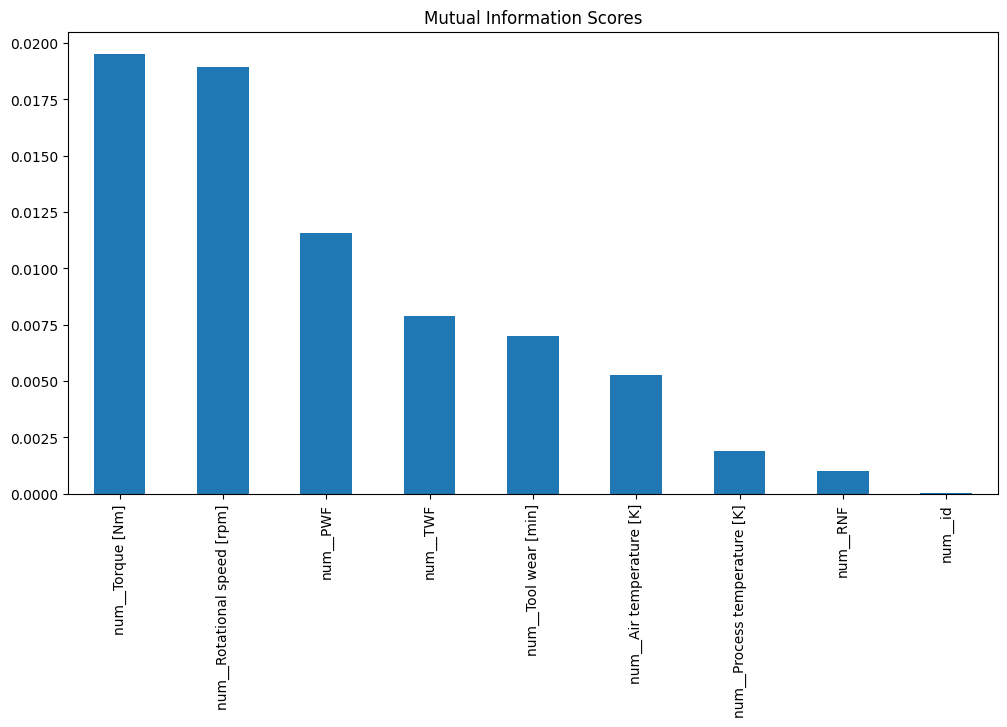

In [124]:
mi.plot(kind='bar', title='Mutual Information Scores', figsize=(12, 6))

### Select 4 top Feature

In [125]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif, k=4)
sel.fit(X_pre, Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Rotational speed [rpm]', 'num__Torque [Nm]', 'num__TWF',
       'num__PWF'], dtype=object)

In [126]:
sel_cols[0].split('__')

['num', 'Rotational speed [rpm]']

In [127]:
sel_cols[0].split('__')[1]

'Rotational speed [rpm]'

In [128]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [129]:
imp_cols

['Rotational speed [rpm]', 'Torque [Nm]', 'TWF', 'PWF']

In [130]:
X_imp = X[imp_cols]
X_imp

,Rotational speed [rpm],Torque [Nm],TWF,PWF
0,1596,36.1,0,0
1,1759,29.1,0,0
2,1805,26.5,0,0
3,1524,44.3,0,0
4,1641,35.4,0,0
...,...,...,...,...
136424,1530,37.5,0,0
136425,1447,49.1,0,0
136426,1524,38.5,0,0
136427,1447,46.3,0,0


### Seperation cat and con 

In [131]:
cat_sel = list(X_imp.columns[X_imp.dtypes=='object'])
con_sel = list(X_imp.columns[X_imp.dtypes!='object'])

In [132]:
cat_sel

[]

In [133]:
con_sel

['Rotational speed [rpm]', 'Torque [Nm]', 'TWF', 'PWF']

### Create final sklearn pipeline

Cat-Onehotencoder

In [134]:
from sklearn.preprocessing import OneHotEncoder

In [135]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [136]:
cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('OHE', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [137]:
pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)]).set_output(transform='pandas')

In [138]:
X_sel_pre = pre2.fit_transform(X_imp)
X_sel_pre.head()

,num__Rotational speed [rpm],num__Torque [Nm],num__TWF,num__PWF
0,0.545416,-0.499711,-0.03945,-0.049016
1,1.720308,-1.323028,-0.03945,-0.049016
2,2.051873,-1.628831,-0.03945,-0.049016
3,0.026445,0.464745,-0.03945,-0.049016
4,0.869773,-0.582043,-0.03945,-0.049016


### Algo Evaluation

Apply train test Split

In [139]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3, random_state=42)

In [140]:
xtrain.head()

,num__id,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__PWF,num__RNF
58494,-0.246803,1.469856,0.331317,-0.744803,0.958735,1.478799,-0.03945,-0.049016,-0.047568
75360,0.181446,-0.516999,0.475704,-0.636684,0.229512,1.447532,-0.03945,-0.049016,-0.047568
131485,1.606529,-0.141107,-0.823778,-1.025912,0.241274,-0.741172,-0.03945,-0.049016,-0.047568
45948,-0.565361,0.073688,0.403510,-0.024010,0.488269,-0.334698,-0.03945,-0.049016,-0.047568
105004,0.934144,0.181085,-0.101844,3.752944,-2.487432,0.650218,-0.03945,-0.049016,-0.047568


In [141]:
ytrain.head()

,Machine failure
58494,0
75360,0
131485,0
45948,0
105004,0


In [142]:
xtest.head()

,num__id,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__PWF,num__RNF
123128,1.394335,0.556977,0.547897,-1.097992,2.546560,-1.444684,-0.03945,-0.049016,-0.047568
54705,-0.343010,0.342182,0.981058,0.163396,-0.511473,1.338097,-0.03945,-0.049016,-0.047568
40016,-0.715982,0.395880,0.331317,-0.153753,-0.217431,0.149943,-0.03945,-0.049016,-0.047568
75025,0.172940,-1.215083,-1.112551,-0.132129,-0.217431,0.400081,-0.03945,-0.049016,-0.047568
120421,1.325601,0.503278,0.547897,0.134564,-0.217431,1.541334,-0.03945,-0.049016,-0.047568


In [143]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [144]:
xtrain.shape

(95500, 9)

In [145]:
xtest.shape

(40929, 9)

### Algo Evaluation

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [147]:
dct = {'Logistic' : LogisticRegression(),
       'Decision Tree' : DecisionTreeClassifier(),
       'Random Forest': RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier(),
       'KNN': KNeighborsClassifier(),
       'SVM': SVC()}

In [148]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier()), ('KNN', KNeighborsClassifier()), ('SVM', SVC())])

### Fit the model and evaluate the results

Evaluate model with F1 Score

In [149]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [150]:
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate f1 score in train and test
    f1_tr = f1_score(ytrain, ypred_tr)
    f1_ts = f1_score(ytest, ypred_ts)
    # 5 - fold cross validation on training
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Append above results in tr, ts, tr_cv
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(f1_cv)
    # Print above results for each model
    print(f'Model name : {name}\n')
    print(f'Train F1 : {f1_tr:.4f}')
    print(f'Train F1 Cross Validated : {f1_cv:.4f}')
    print(f'Test F1 : {f1_ts:.4f}')
    print('\n=========================================================================\n')

Model name : Logistic

Train F1 : 0.4143
Train F1 Cross Validated : 0.7022
Test F1 : 0.4300




Model name : Decision Tree

Train F1 : 1.0000
Train F1 Cross Validated : 0.7298
Test F1 : 0.4647


Model name : Random Forest

Train F1 : 1.0000
Train F1 Cross Validated : 0.7821
Test F1 : 0.5444


Model name : Gradient Boost

Train F1 : 0.6053
Train F1 Cross Validated : 0.7790
Test F1 : 0.5577


Model name : KNN

Train F1 : 0.5783
Train F1 Cross Validated : 0.7369
Test F1 : 0.4887


Model name : SVM

Train F1 : 0.3855
Train F1 Cross Validated : 0.6877
Test F1 : 0.4100




### Save above results in Dataframe

In [151]:
ts

[0.42997542997543,
 0.46466165413533833,
 0.5443548387096774,
 0.5577119509703781,
 0.4887459807073955,
 0.41]

In [152]:
tr

[0.4142561983471074,
 1.0,
 1.0,
 0.6052855924978687,
 0.5783348254252463,
 0.3855165069222577]

In [153]:
tr_cv

[0.7022058861340115,
 0.729787517336135,
 0.7821030461184163,
 0.7789758589425373,
 0.7368602322136658,
 0.6877124662411289]

In [154]:
dct

{'Logistic': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Gradient Boost': GradientBoostingClassifier(),
 'KNN': KNeighborsClassifier(),
 'SVM': SVC()}

In [155]:
list(dct.keys())

['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'KNN', 'SVM']

In [156]:
results_dct = {'Model_name' : list(dct.keys()),
               'Train F1':tr,
               'Test F1':ts,
               'Train F1 CV':tr_cv}

In [157]:
results_df = pd.DataFrame(results_dct)
results_df

,Model_name,Train F1,Test F1,Train F1 CV
0,Logistic,0.414256,0.429975,0.702206
1,Decision Tree,1.000000,0.464662,0.729788
2,Random Forest,1.000000,0.544355,0.782103
3,Gradient Boost,0.605286,0.557712,0.778976
4,KNN,0.578335,0.488746,0.736860
5,SVM,0.385517,0.410000,0.687712


In [158]:
results_df = results_df.sort_values(by='Test F1', ascending=False)
results_df

,Model_name,Train F1,Test F1,Train F1 CV
3,Gradient Boost,0.605286,0.557712,0.778976
2,Random Forest,1.000000,0.544355,0.782103
4,KNN,0.578335,0.488746,0.736860
1,Decision Tree,1.000000,0.464662,0.729788
0,Logistic,0.414256,0.429975,0.702206
5,SVM,0.385517,0.410000,0.687712


### Create the SVM model

In [159]:
best_model = SVC(probability=True)
best_model.fit(xtrain, ytrain)

In [ ]:
best_model.score(xtrain, ytrain)